In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')


# Set the path to the root directory
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(path)

# Import the data
df_read = pd.read_csv(path + '/LSTM-MLP_notebooks/predictions/predictions2022v.5.0.csv')

In [23]:
df = df_read.copy()
display(df.head())

,Unnamed: 0,Quote_date,Price,Prediction,Underlying_last,Strike,TTM,R
0,3373178,2022-01-03,2594.15,2594.3940,4795.57,2200.0,2,0.05
1,3373179,2022-01-03,2494.15,2494.6726,4795.57,2300.0,2,0.05
2,3373180,2022-01-03,2394.15,2394.8284,4795.57,2400.0,2,0.05
3,3373181,2022-01-03,2294.15,2295.2698,4795.57,2500.0,2,0.05
4,3373182,2022-01-03,2194.15,2195.3953,4795.57,2600.0,2,0.05


Group:
         Unnamed: 0  Quote_date     Price  Prediction  Underlying_last  \
8248        3381426  2022-01-04  2596.650   2594.1930          4793.19   
8249        3381427  2022-01-04  2496.650   2494.4480          4793.19   
8250        3381428  2022-01-04  2396.750   2394.7920          4793.19   
8251        3381429  2022-01-04  2296.750   2295.1930          4793.19   
8252        3381430  2022-01-04  2196.750   2195.2827          4793.19   
...             ...         ...       ...         ...              ...   
1799407     5172585  2022-12-29     0.025      0.0000          3848.66   
1799408     5172586  2022-12-29     0.025      0.0000          3848.66   
1799409     5172587  2022-12-29     0.025      0.0000          3848.66   
1799410     5172588  2022-12-29     0.025      0.0000          3848.66   
1799411     5172589  2022-12-29     0.025      0.0000          3848.66   

         Strike  TTM     R  
8248     2200.0    1  0.06  
8249     2300.0    1  0.06  
8250     2400.0  

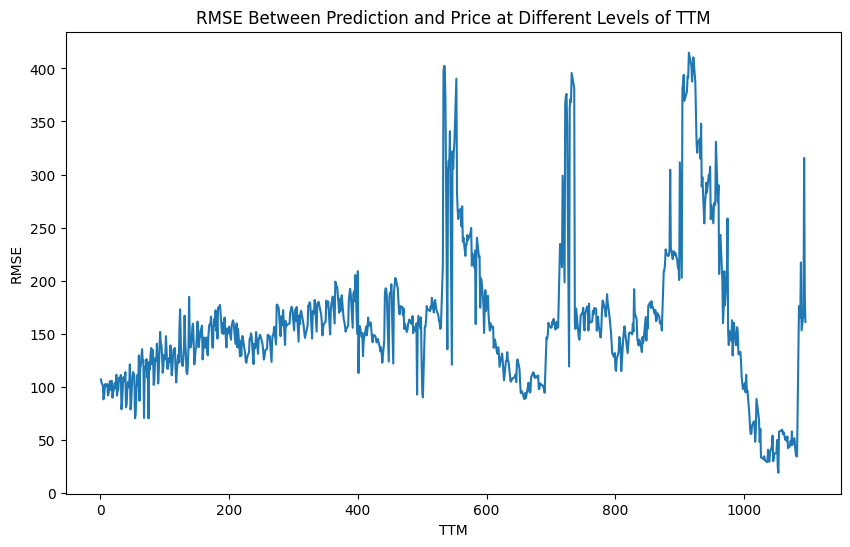

In [24]:
# Graph the RSME between prediction and price for different levels of TTM
def calculate_rmse(group):
    mse = tf.keras.losses.MSE(group['Price'], group['Prediction'])
    rmse = np.sqrt(mse)
    print(f"Group:\n{group}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    return rmse

rmse_by_ttm = df.groupby('TTM').apply(calculate_rmse).reset_index(name='RMSE')

plt.figure(figsize=(10, 6))
sns.lineplot(x='TTM', y='RMSE', data=rmse_by_ttm)
plt.title("RMSE Between Prediction and Price at Different Levels of TTM")
plt.xlabel("TTM")
plt.ylabel("RMSE")
plt.show()

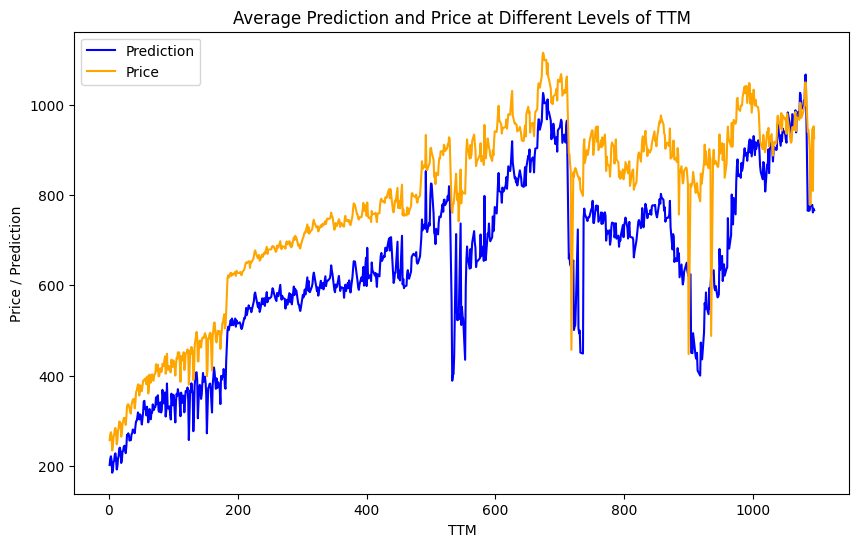

In [28]:
def calculate_average(group):
    average_prediction = group['Prediction'].mean()
    average_price = group['Price'].mean()
    return pd.Series({'Average Prediction': average_prediction, 'Average Price': average_price})

average_by_ttm = df.groupby('TTM').apply(calculate_average).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='TTM', y='Average Prediction', data=average_by_ttm, color='blue', label='Prediction')
sns.lineplot(x='TTM', y='Average Price', data=average_by_ttm, color='orange', label='Price')
plt.title("Average Prediction and Price at Different Levels of TTM")
plt.xlabel("TTM")
plt.ylabel("Price / Prediction")
plt.legend()
plt.show()


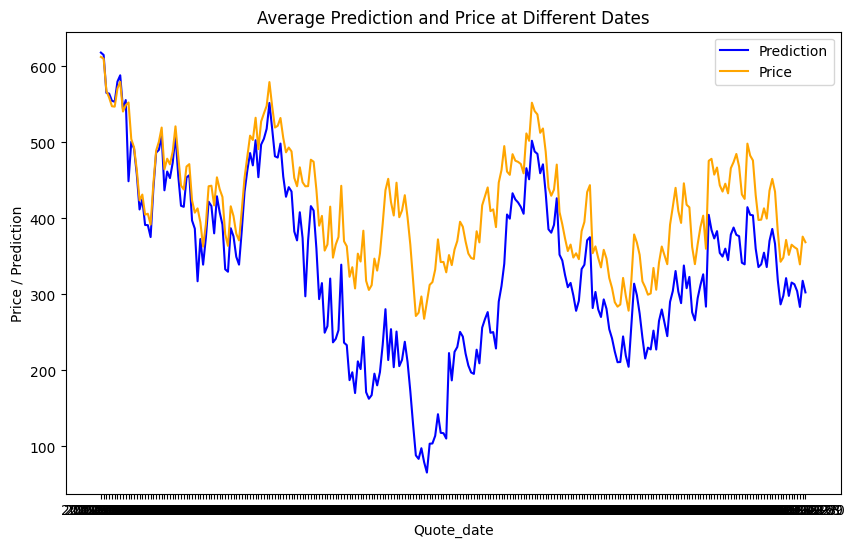

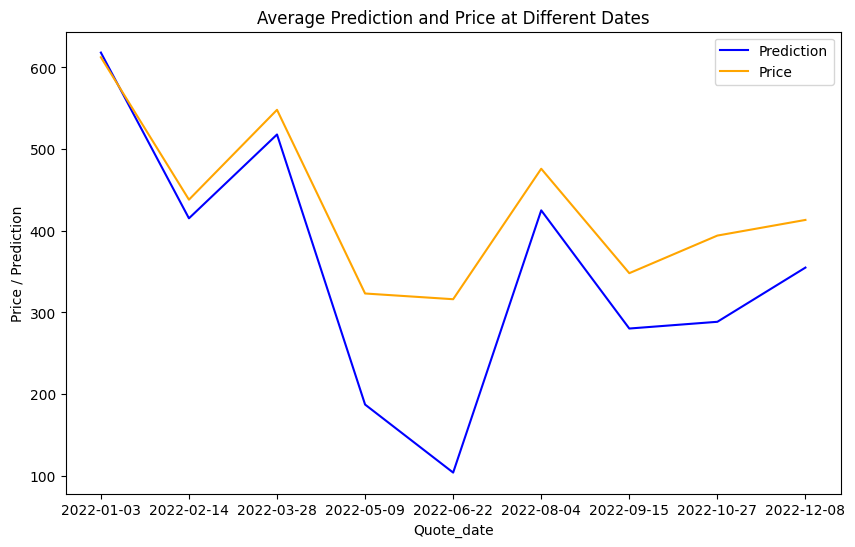

In [30]:
# Plot the average prediction and price for different dates
def calculate_average(group):
    average_prediction = group['Prediction'].mean()
    average_price = group['Price'].mean()
    return pd.Series({'Average Prediction': average_prediction, 'Average Price': average_price})

average_by_date = df.groupby('Quote_date').apply(calculate_average).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Quote_date', y='Average Prediction', data=average_by_date, color='blue', label='Prediction')
sns.lineplot(x='Quote_date', y='Average Price', data=average_by_date, color='orange', label='Price')
plt.title("Average Prediction and Price at Different Dates")
plt.xlabel("Quote_date")
plt.ylabel("Price / Prediction")
plt.legend()
plt.show()

# Decrease the number of dates to make the graph more readable

# Get the dates
dates = average_by_date['Quote_date'].unique()

# Get the dates to keep
dates_to_keep = []
for i in range(0, len(dates), 30):
    dates_to_keep.append(dates[i])

# Filter the dataframe
average_by_date = average_by_date[average_by_date['Quote_date'].isin(dates_to_keep)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Quote_date', y='Average Prediction', data=average_by_date, color='blue', label='Prediction')
sns.lineplot(x='Quote_date', y='Average Price', data=average_by_date, color='orange', label='Price')
plt.title("Average Prediction and Price at Different Dates")
plt.xlabel("Quote_date")
plt.ylabel("Price / Prediction")
plt.legend()
plt.show()



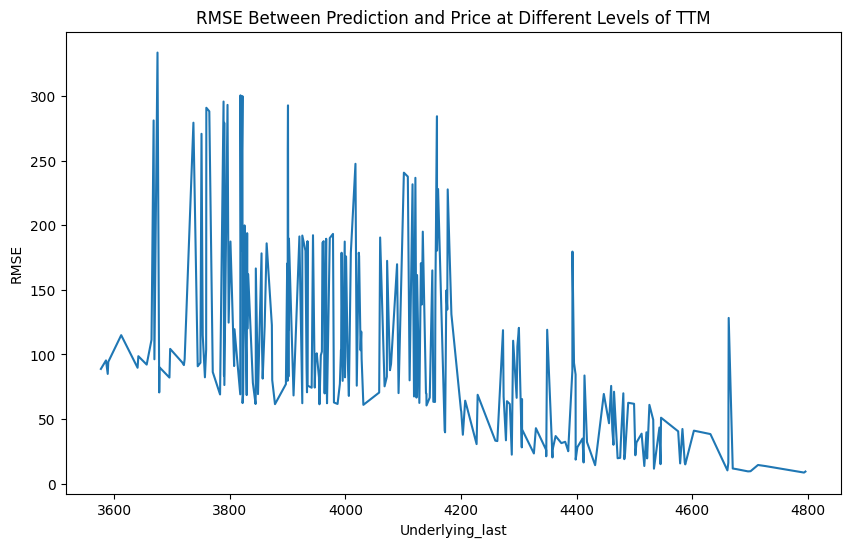

In [27]:
# Graph the RSME between prediction and price for different levels of TTM
def calculate_rmse(group):
    rmse = np.sqrt(tf.keras.losses.MSE(group['Price'], group['Prediction']))
    return rmse

rmse_by_ttm = df.groupby('Underlying_last').apply(calculate_rmse).reset_index(name='RMSE')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Underlying_last', y='RMSE', data=rmse_by_ttm)
plt.title("RMSE Between Prediction and Price at Different Levels of TTM")
plt.xlabel("Underlying_last")
plt.ylabel("RMSE")
plt.show()